# Aprendizagem Supervisionada: Classificação

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para prever a tendência de uma pessoa desenvolver algum tipo de doença cardíaca com base em alguns fatores clínicos e laboratoriais. 

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/fedesoriano/heart-failure-prediction/version/1

# Pré-Processamento

In [1]:
# Impotação das bibliotecas
import pandas as pd
import numpy as np

In [2]:
# Importação dos dados
df = pd.read_csv('heart_tratado.csv', sep=';')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [3]:
# Shape dos dados
df.shape

(917, 12)

## **Transformando as variáveis categóricas nominais em variáveis categóricas ordinais**

In [4]:
df2 = df.copy()
df2

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat,1
913,68,M,ASY,144,193.0,1,Normal,141,N,3.4,Flat,1
914,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1
915,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat,1


In [5]:
# Transformação das variaveis
df2['Sex'].replace({'M':0, 'F': 1}, inplace=True)
df2['ChestPainType'].replace({'TA':0, 'ATA': 1, 'NAP':2, 'ASY': 3}, inplace=True)
df2['RestingECG'].replace({'Normal':0, 'ST': 1, 'LVH':2}, inplace=True)
df2['ExerciseAngina'].replace({'N':0, 'Y': 1}, inplace=True)
df2['ST_Slope'].replace({'Up':0, 'Flat': 1, 'Down':2}, inplace=True)

In [6]:
# Cabeçalho
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289.0,0,0,172,0,0.0,0,0
1,49,1,2,160,180.0,0,0,156,0,1.0,1,1
2,37,0,1,130,283.0,0,1,98,0,0.0,0,0
3,48,1,3,138,214.0,0,0,108,1,1.5,1,1
4,54,0,2,150,195.0,0,0,122,0,0.0,0,0


In [7]:
# Tipo dos dados
df2.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol       float64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

In [8]:
# Shape dos dados
df2.shape

(917, 12)

## **LEGENDA**

**Age** = idade (anos)

**Sex** = sexo (0=M; 1=F)

**Chest Pain Type** = tipo de dor no peito (0=TA:angina típica; 1=ATA:angina atípica; 2=NAP:dor não anginosa; 3=ASY:assintomático)

**Resting BP** = pressão sanguínea em repouso (mmHg)

**Cholesterol** = colesterol sérico (mg/dl)

**Fasting BS** = açúcar no sangue em jejum (mg/dl)
          0: Fasting BS < 120 mg/dl (não diabético)
          1: Fasting BS >= 120 mg/dl, (diabético)

**Resting ECG** = eletrocardiograma em repouso (0=Normal; 1=ST:Anormalidade da onda ST-T; 2=LVH: Hipertrofia ventricular esquerda)

**Max HR** = frequência cardíaca máxima

**Exercise Angina** = Angina induzida por exercício (0=Não; 1=Sim)

**Old Peak** = Depressão de ST induzida por exercício em relação ao repouso

**ST_Slope** = Inclinação do segmento ST (0=UP; 1=Flat; 2=Down)

**Heart Disease** = Doença cardíaca (0=Não possui doença cardíaca; 1=Possui doença cardíaca)


## **ATRIBUTOS PREVISORES E ALVO**

In [9]:
# Criando o 1 Previsores: Selecionando da 0 ate a 10 colunas. todos os valores de todas as linhas
previsores = df2.iloc[:, 0:11].values
previsores

array([[40. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       [49. ,  1. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [57. ,  0. ,  3. , ...,  1. ,  1.2,  1. ],
       [57. ,  1. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  0. ,  2. , ...,  0. ,  0. ,  0. ]])

In [10]:
# Shape dos dados
previsores.shape

(917, 11)

In [11]:
# Criando o alvo, selecionando apenas os valores da ultima coluna
alvo = df2.iloc[:, 11].values
alvo[:100]

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [12]:
# Shape de alvo
alvo.shape

(917,)

## **Análise das escalas dos atributos (Escalonamento)**

In [13]:
# Descrição estatistica dos dados
df2.describe().round(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,917.000,917.000,917.000,917.000,917.000,917.000,917.000,917.000,917.000,917.000,917.000,917.000
mean,53.509,0.210,2.252,132.541,244.635,0.233,0.604,136.790,0.405,0.887,0.638,0.553
std,9.438,0.408,0.932,18.000,53.347,0.423,0.806,25.467,0.491,1.067,0.607,0.497
min,28.000,0.000,0.000,80.000,85.000,0.000,0.000,60.000,0.000,-2.600,0.000,0.000
25%,47.000,0.000,2.000,120.000,214.000,0.000,0.000,120.000,0.000,0.000,0.000,0.000
50%,54.000,0.000,3.000,130.000,244.635,0.000,0.000,138.000,0.000,0.600,1.000,1.000
75%,60.000,0.000,3.000,140.000,267.000,0.000,1.000,156.000,1.000,1.500,1.000,1.000
max,77.000,1.000,3.000,200.000,603.000,1.000,2.000,202.000,1.000,6.200,2.000,1.000


**Padronização** (utiliza a média e o desvio padrão como referência).

**Normalização** (utiliza os valores máximo e mínimo como referência).

In [14]:
# Importação da biblioteca para escalonamento
from sklearn.preprocessing import StandardScaler

In [15]:
# Criando o Previsores Esc: Sera Escalonada com o StandardScaler
previsores_esc = StandardScaler().fit_transform(previsores)
previsores_esc

array([[-1.43220634, -0.51630861, -1.34470119, ..., -0.82431012,
        -0.83150225, -1.05109458],
       [-0.47805725,  1.9368261 , -0.27058012, ..., -0.82431012,
         0.10625149,  0.59651863],
       [-1.75025603, -0.51630861, -1.34470119, ..., -0.82431012,
        -0.83150225, -1.05109458],
       ...,
       [ 0.37007527, -0.51630861,  0.80354095, ...,  1.21313565,
         0.29380223,  0.59651863],
       [ 0.37007527,  1.9368261 , -1.34470119, ..., -0.82431012,
        -0.83150225,  0.59651863],
       [-1.64423947, -0.51630861, -0.27058012, ..., -0.82431012,
        -0.83150225, -1.05109458]])

In [16]:
# Tranformando em DataFrame para visualiza os dados
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

,0,1,2,3,4,5,6,7,8,9,10
0,-1.432206,-0.516309,-1.344701,0.414627,0.832075,-0.551733,-0.749818,1.383339,-0.824310,-0.831502,-1.051095
1,-0.478057,1.936826,-0.270580,1.526360,-1.212261,-0.551733,-0.749818,0.754736,-0.824310,0.106251,0.596519
2,-1.750256,-0.516309,-1.344701,-0.141240,0.719543,-0.551733,0.491306,-1.523953,-0.824310,-0.831502,-1.051095
3,-0.584074,1.936826,0.803541,0.303453,-0.574578,-0.551733,-0.749818,-1.131075,1.213136,0.575128,0.596519
4,0.052026,-0.516309,-0.270580,0.970493,-0.930931,-0.551733,-0.749818,-0.581047,-0.824310,-0.831502,-1.051095
...,...,...,...,...,...,...,...,...,...,...,...
912,-0.902124,-0.516309,-2.418822,-1.252973,0.363191,-0.551733,-0.749818,-0.188170,-0.824310,0.293802,0.596519
913,1.536257,-0.516309,0.803541,0.636973,-0.968441,1.812470,-0.749818,0.165420,-0.824310,2.356860,0.596519
914,0.370075,-0.516309,0.803541,-0.141240,-2.131275,-0.551733,-0.749818,-0.856061,1.213136,0.293802,0.596519
915,0.370075,1.936826,-1.344701,-0.141240,-0.161960,-0.551733,1.732430,1.461915,-0.824310,-0.831502,0.596519


In [17]:
# Descrição estatistica
previsoresdf.describe().round(5)

,0,1,2,3,4,5,6,7,8,9,10
count,917.00000,917.00000,917.00000,917.00000,917.00000,917.00000,917.00000,917.00000,917.00000,917.00000,917.00000
mean,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000
std,1.00055,1.00055,1.00055,1.00055,1.00055,1.00055,1.00055,1.00055,1.00055,1.00055,1.00055
min,-2.70441,-0.51631,-2.41882,-2.92057,-2.99402,-0.55173,-0.74982,-3.01689,-0.82431,-3.26966,-1.05109
25%,-0.69009,-0.51631,-0.27058,-0.69711,-0.57458,-0.55173,-0.74982,-0.65962,-0.82431,-0.83150,-1.05109
50%,0.05203,-0.51631,0.80354,-0.14124,0.00000,-0.55173,-0.74982,0.04756,-0.82431,-0.26885,0.59652
75%,0.68812,-0.51631,0.80354,0.41463,0.41946,-0.55173,0.49131,0.75474,1.21314,0.57513,0.59652
max,2.49041,1.93683,0.80354,3.74983,6.72127,1.81247,1.73243,2.56197,1.21314,4.98257,2.24413


## **Codificação de variáveis categóricas**

### **LabelEncoder: transformação de variáveis categóricas em numéricas**


In [18]:
# Biblioteca para transformação das Variaveis Categoricas
from sklearn.preprocessing import LabelEncoder

In [19]:
# 5 Primeiras linhas
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [20]:
# Criando previsores
previsores2 = df.iloc[:, 0:11].values
previsores2

array([[40, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       [49, 'F', 'NAP', ..., 'N', 1.0, 'Flat'],
       [37, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       ...,
       [57, 'M', 'ASY', ..., 'Y', 1.2, 'Flat'],
       [57, 'F', 'ATA', ..., 'N', 0.0, 'Flat'],
       [38, 'M', 'NAP', ..., 'N', 0.0, 'Up']], dtype=object)

In [21]:
# Transformando com o Label encoder apenas da segunda coluna
previsores2[:,1] = LabelEncoder().fit_transform(previsores[:,1])
previsores2

array([[40, 0, 'ATA', ..., 'N', 0.0, 'Up'],
       [49, 1, 'NAP', ..., 'N', 1.0, 'Flat'],
       [37, 0, 'ATA', ..., 'N', 0.0, 'Up'],
       ...,
       [57, 0, 'ASY', ..., 'Y', 1.2, 'Flat'],
       [57, 1, 'ATA', ..., 'N', 0.0, 'Flat'],
       [38, 0, 'NAP', ..., 'N', 0.0, 'Up']], dtype=object)

In [22]:
# Transformando todas as outras colunas com LabelEncoder
previsores2[:, 2] = LabelEncoder().fit_transform(previsores2[:, 2])
previsores2[:, 6] = LabelEncoder().fit_transform(previsores2[:, 6])
previsores2[:, 8] = LabelEncoder().fit_transform(previsores2[:, 8])
previsores2[:,10] = LabelEncoder().fit_transform(previsores2[:,10])

In [23]:
# Visualizando todas as colunas transformadas
previsores2

array([[40, 0, 1, ..., 0, 0.0, 2],
       [49, 1, 2, ..., 0, 1.0, 1],
       [37, 0, 1, ..., 0, 0.0, 2],
       ...,
       [57, 0, 0, ..., 1, 1.2, 1],
       [57, 1, 1, ..., 0, 0.0, 1],
       [38, 0, 2, ..., 0, 0.0, 2]], dtype=object)

In [24]:
# SHape
previsores2.shape

(917, 11)

### **OneHotEncoder: Criação de variáveis Dummy (fictícia).**

Cuidado com a multicolinearidade (variáveis altamente correlacionadas entre si).

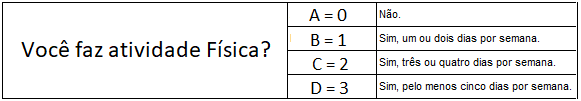


A   B   C   D   
1   0   0   0   
0   1   0   0   
0   0   1   0   
0   0   0   1

In [25]:
# Importando as Bibliotecas necessarias
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [26]:
ColumnTransformer?

**Parâmetros ColumnTransformer**
- **name:** nome dado a transformação.
- **transformer:** tipo de estimador (OneHotEncoder).
- **columns:** colunas que serão transformadas.
- **remainder:** o que acontecerá com o restante das colunas não relacionadas: 
1) drop = exclui as outras colunas.
2) passthrough = mantém as outras colunas. drop é default.  
- **sparse_threshold:** parâmetro de classificação de matrizes esparsas. default é 0.3
- **n_jobs:** número de trabalhos a serem executados em paralelo. default é nenhum
- **transformer_weights:** definição de pesos aos transformadores.
- **verbose:** default é False. se for True a execução é apresentada na tela.

In [27]:
# Criando outra variavel previsores3
previsores3 = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,2,6,8,10])],
                                remainder='passthrough').fit_transform(previsores2)
previsores3

array([[1.0, 0.0, 0.0, ..., 0, 172, 0.0],
       [0.0, 1.0, 0.0, ..., 0, 156, 1.0],
       [1.0, 0.0, 0.0, ..., 0, 98, 0.0],
       ...,
       [1.0, 0.0, 1.0, ..., 0, 115, 1.2],
       [0.0, 1.0, 0.0, ..., 0, 174, 0.0],
       [1.0, 0.0, 0.0, ..., 0, 173, 0.0]], dtype=object)

In [28]:
# Shape
previsores3.shape

(917, 20)

In [29]:
# Criando o DataFrame apenas para visualiza
previsores3df = pd.DataFrame(previsores3)
previsores3df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,40,140,289.0,0,172,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,49,160,180.0,0,156,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,37,130,283.0,0,98,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,48,138,214.0,0,108,1.5
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,54,150,195.0,0,122,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,45,110,264.0,0,132,1.2
913,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,68,144,193.0,1,141,3.4
914,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,57,130,131.0,0,115,1.2
915,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,57,130,236.0,0,174,0.0


## **Escalonamento**

In [30]:
# Importando a biblioteca
from sklearn.preprocessing import StandardScaler

In [31]:
# Criando previsores 3esc
previsores3_esc = StandardScaler().fit_transform(previsores3)
previsores3_esc

array([[ 0.51630861, -0.51630861, -1.08542493, ..., -0.55173333,
         1.38333943, -0.83150225],
       [-1.9368261 ,  1.9368261 , -1.08542493, ..., -0.55173333,
         0.75473573,  0.10625149],
       [ 0.51630861, -0.51630861, -1.08542493, ..., -0.55173333,
        -1.52395266, -0.83150225],
       ...,
       [ 0.51630861, -0.51630861,  0.92129817, ..., -0.55173333,
        -0.85606123,  0.29380223],
       [-1.9368261 ,  1.9368261 , -1.08542493, ..., -0.55173333,
         1.46191489, -0.83150225],
       [ 0.51630861, -0.51630861, -1.08542493, ..., -0.55173333,
         1.42262716, -0.83150225]])

In [32]:
# Criando o DataFrame para visualizacao
previsores3_escdf = pd.DataFrame(previsores3_esc)
previsores3_escdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.516309,-0.516309,-1.085425,2.073784,-0.531524,-0.229810,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,-1.001091,1.149573,-1.432206,0.414627,0.832075,-0.551733,1.383339,-0.831502
1,-1.936826,1.936826,-1.085425,-0.482210,1.881384,-0.229810,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,0.998910,-0.869888,-0.478057,1.526360,-1.212261,-0.551733,0.754736,0.106251
2,0.516309,-0.516309,-1.085425,2.073784,-0.531524,-0.229810,-0.507826,-1.226974,2.037569,0.824310,-0.824310,-0.271607,-1.001091,1.149573,-1.750256,-0.141240,0.719543,-0.551733,-1.523953,-0.831502
3,-1.936826,1.936826,0.921298,-0.482210,-0.531524,-0.229810,-0.507826,0.815013,-0.490781,-1.213136,1.213136,-0.271607,0.998910,-0.869888,-0.584074,0.303453,-0.574578,-0.551733,-1.131075,0.575128
4,0.516309,-0.516309,-1.085425,-0.482210,1.881384,-0.229810,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,-1.001091,1.149573,0.052026,0.970493,-0.930931,-0.551733,-0.581047,-0.831502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,0.516309,-0.516309,-1.085425,-0.482210,-0.531524,4.351412,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,0.998910,-0.869888,-0.902124,-1.252973,0.363191,-0.551733,-0.188170,0.293802
913,0.516309,-0.516309,0.921298,-0.482210,-0.531524,-0.229810,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,0.998910,-0.869888,1.536257,0.636973,-0.968441,1.812470,0.165420,2.356860
914,0.516309,-0.516309,0.921298,-0.482210,-0.531524,-0.229810,-0.507826,0.815013,-0.490781,-1.213136,1.213136,-0.271607,0.998910,-0.869888,0.370075,-0.141240,-2.131275,-0.551733,-0.856061,0.293802
915,-1.936826,1.936826,-1.085425,2.073784,-0.531524,-0.229810,1.969177,-1.226974,-0.490781,0.824310,-0.824310,-0.271607,0.998910,-0.869888,0.370075,-0.141240,-0.161960,-0.551733,1.461915,-0.831502


In [33]:
# Descrição Estatistica
previsores3_escdf.describe().round(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,917.0000,917.0000,917.0000,917.0000,917.0000,917.0000,917.0000,917.0000,917.0000,917.0000,917.0000,917.0000,917.0000,917.0000,917.0000,917.0000,917.0000,917.0000,917.0000,917.0000
mean,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000
std,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005
min,-1.9368,-0.5163,-1.0854,-0.4822,-0.5315,-0.2298,-0.5078,-1.2270,-0.4908,-1.2131,-0.8243,-0.2716,-1.0011,-0.8699,-2.7044,-2.9206,-2.9940,-0.5517,-3.0169,-3.2697
25%,0.5163,-0.5163,-1.0854,-0.4822,-0.5315,-0.2298,-0.5078,-1.2270,-0.4908,-1.2131,-0.8243,-0.2716,-1.0011,-0.8699,-0.6901,-0.6971,-0.5746,-0.5517,-0.6596,-0.8315
50%,0.5163,-0.5163,0.9213,-0.4822,-0.5315,-0.2298,-0.5078,0.8150,-0.4908,0.8243,-0.8243,-0.2716,0.9989,-0.8699,0.0520,-0.1412,0.0000,-0.5517,0.0476,-0.2689
75%,0.5163,-0.5163,0.9213,-0.4822,-0.5315,-0.2298,-0.5078,0.8150,-0.4908,0.8243,1.2131,-0.2716,0.9989,1.1496,0.6881,0.4146,0.4195,-0.5517,0.7547,0.5751
max,0.5163,1.9368,0.9213,2.0738,1.8814,4.3514,1.9692,0.8150,2.0376,0.8243,1.2131,3.6818,0.9989,1.1496,2.4904,3.7498,6.7213,1.8125,2.5620,4.9826


## <font color='blue'>**RESUMO PRÉ-PROCESSAMENTO**</font>

**<font color='green'> alvo </font>** = variável que se pretende atingir (tem ou não doença cardíaca).

**<font color='green'> Previsores </font>** = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas manualmente, sem escalonar.

**<font color='green'> Previsores_esc </font>** = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas, escalonada.

**<font color='green'> Previsores2 </font>** = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas pelo labelencoder.

**<font color='green'> Previsores3 </font>** = conjunto de variáveis previsoras transformadas pelo labelencoder e onehotencoder, sem escalonar.

**<font color='green'> Previsores3_esc </font>** = conjunto de variáveis previsoras transformadas pelo labelencoder e onehotencoder escalonada.

## **Redução de dimensionalidade**

Objetivo é selecionar os melhores componentes (atributos) para treinamento do algoritmo, através da análise das correlações entre as variáveis.


### Análise dos Componentes Principais (PCA)

**Seleção de características:** seleciona os melhores atributos e utiliza sem transformações.

**Extração de Características:** Encontra os relacionamentos dos melhores atributos e cria novos atributos.

É um algoritmo de aprendizagem não supervisionada.

Aplica-se em dados linearmente separáveis.

In [34]:
# Importando a Biblioteca
from sklearn.decomposition import PCA

In [35]:
# Criando o PCA
pca = PCA(n_components=3, svd_solver='arpack')

In [36]:
# Criando os previsores PCA
previsores_pca = pca.fit_transform(previsores2)

In [37]:
# Shape dos previsores
previsores_pca.shape

(917, 3)

In [38]:
# Principais Componentes
previsores_pca

array([[  44.01218603,  -36.15137592,   10.64727631],
       [ -63.9918455 ,  -13.93849233,   31.69212503],
       [  38.53844277,   33.91712222,  -12.48837374],
       ...,
       [-113.3467467 ,   23.48595247,   -2.51064362],
       [  -9.1141306 ,  -35.90083188,    4.81814643],
       [ -70.01342608,  -35.68741686,   12.10984845]])

In [39]:
# Razao das variaveis Explicativas
pca.explained_variance_ratio_

array([0.72847929, 0.17183534, 0.08122019])

In [40]:
# Soma das variaveis explicativas
pca.explained_variance_ratio_.sum()

0.9815348236774054

### Kernel PCA

É um algoritmo de aprendizagem não supervisionada.

Aplica-se também em dados linearmente não separáveis.

In [41]:
# Importação da biblioteca
from sklearn.decomposition import KernelPCA

In [42]:
kpca = KernelPCA(n_components=4, kernel='rbf')

In [43]:
previsores_kernel = kpca.fit_transform(previsores2)
previsores_kernel

array([[-0.00249772, -0.00290225, -0.0027372 , -0.00191636],
       [-0.00249877, -0.00290359, -0.00273854, -0.00191743],
       [-0.00249785, -0.00290241, -0.00273736, -0.00191649],
       ...,
       [-0.00249774, -0.00290227, -0.00273723, -0.00191638],
       [-0.00249793, -0.00290252, -0.00273748, -0.00191659],
       [-0.00249772, -0.00290225, -0.0027372 , -0.00191637]])

In [44]:
# Shape
previsores_kernel.shape

(917, 4)

### **Análise do Discriminante Linear (LDA: Linear Discriminant Analysis)**

Algoritmo de aprendizagem supervisionada, pois utiliza a classe como referência para seleção.

Aplicado em situações com muitos atributos previsores e também com o atributo alvo com muitas classes.

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 1)
lda

LinearDiscriminantAnalysis(n_components=1)

In [46]:
previsores_lda = lda.fit_transform(previsores2, alvo)
previsores_lda[:10]

array([[-1.47297727],
       [-1.41360735],
       [-0.96705302],
       [ 0.53331037],
       [-1.45783427],
       [-1.78559221],
       [-2.28906835],
       [-1.26844095],
       [ 1.03044735],
       [-1.8033219 ]])

In [47]:
lda.explained_variance_ratio_

array([1.])

## **Salvando as variáveis (atributos)**

In [48]:
# Importando a Biblioteca necessaria
import pickle

In [49]:
# Criando o primeiro arquivo
arq1 = open('heart.pkl', 'wb')

In [50]:
# Salvando a variavel no arquivo
pickle.dump(alvo, arq1)

In [51]:
# Fechando o arquivo
arq1.close()

In [52]:
# Lendo o arquivo
arq1 = open('heart.pkl', 'rb')

In [53]:
# Chamando a variavel
alvo = pickle.load(arq1)
alvo[:100]

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [54]:
# Criando arquivos e Salvando as variáveis
arq2 = open('heart2.pkl', 'wb')
arq3 = open('heart3.pkl', 'wb')
arq4 = open('heart4.pkl', 'wb')
arq5 = open('heart5.pkl', 'wb')
arq6 = open('heart6.pkl', 'wb')

In [59]:
# Criando arquivos e Salvando as variáveis
pickle.dump(previsores, arq2)
pickle.dump(previsores_esc, arq3)
pickle.dump(previsores2, arq4)
pickle.dump(previsores3, arq5)
pickle.dump(previsores3_esc, arq6)

'pickle.dump(previsores, arq2)\npickle.dump(previsores_esc, arq3)\npickle.dump(previsores2, arq4)\npickle.dump(previsores3, arq5)\npickle.dump(previsores3_esc, arq6)'

In [60]:
# Abrindo
arq2 = open('heart2.pkl', 'rb')

In [61]:
previsores = pickle.load(arq2)
previsores

array([[40. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       [49. ,  1. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [57. ,  0. ,  3. , ...,  1. ,  1.2,  1. ],
       [57. ,  1. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  0. ,  2. , ...,  0. ,  0. ,  0. ]])

In [63]:
arq3 = open('heart3.pkl', 'rb')
previsores_esc   =  pickle.load(arq3)

In [64]:
arq6 = open('heart6.pkl', 'rb')
previsores3_esc =  pickle.load(arq6)